<a href="https://colab.research.google.com/github/DomenicoArmillotta/MSC_thesis-Uml_quality_assessment_with_ML/blob/main/provaOPENcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab import drive
from matplotlib import pyplot as plt


In [ ]:
# setup directory used in the project for training and test phase
drive.mount('/content/drive')
#data_dir = '/content/drive/MyDrive/UML'


MessageError: ignored

In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')


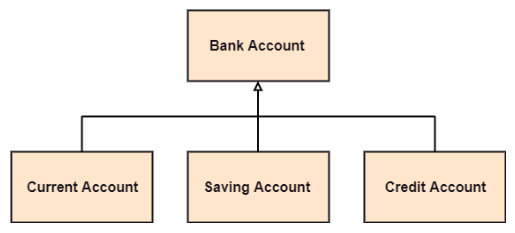

In [ ]:
#show image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()


# Faster-RCNN

In [1]:
!pip install detecto

In [2]:
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
from detecto import core, visualize, utils
from detecto.core import Dataset, DataLoader

In [3]:
# setup directory used in the project for training and test phase
# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')




Mounted at /content/drive


## Xml - Jpg / Preprocessing and organiztion file

rename from 0 to #file

In [ ]:
import os
import glob

def rename_files_with_same_base(directory_path):
    # Get a list of all files in the directory with different extensions
    files = glob.glob(os.path.join(directory_path, '*.*'))

    # Create a dictionary to store the mapping between old names and new names
    name_mapping = {}

    for file_path in files:
        # Get the base name without the extension
        base_name = os.path.splitext(os.path.basename(file_path))[0]

        if base_name not in name_mapping:
            # If the base name is not already in the mapping, add it with a new number
            name_mapping[base_name] = len(name_mapping) + 1

    # Rename the files using the mapping
    for file_path in files:
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        file_extension = os.path.splitext(file_path)[1]
        new_name = str(name_mapping[base_name]) + file_extension

        # Construct the new path and rename the file
        new_path = os.path.join(directory_path, new_name)
        os.rename(file_path, new_path)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_label/train/'
    rename_files_with_same_base(directory_path)


In [ ]:
import os

def check_files_with_whitespace(directory_path):
    files_with_whitespace = []
    for filename in os.listdir(directory_path):
        if ' ' in filename:
            files_with_whitespace.append(filename)
    return files_with_whitespace

# Replace 'your_directory_path' with the path of the directory you want to check
directory_path = '/content/drive/My Drive/dataset_label/train/'
files_with_whitespace = check_files_with_whitespace(directory_path)

if files_with_whitespace:
    print("Files with whitespace in their names:")
    for filename in files_with_whitespace:
        print(filename)
else:
    print("No files with whitespace in their names found.")


No files with whitespace in their names found.


With the ImageLabel labelling software , I created for each uml schema image an associated .xml , this xml having been created locally , had the path to the local machine. So this script rewrites the 'xml by replacing the path.
The xml - jpg association is necessary for model training , because the xml includes the bounded boxes

In [ ]:
import os
import re
import glob
import xml.etree.ElementTree as ET


def rename_filename_and_path_in_xml(directory_path):
    # Get a list of all XML files in the directory
    xml_files = glob.glob(os.path.join(directory_path, '*.xml'))

    for xml_file in xml_files:
        with open(xml_file, 'r') as file:
            xml_content = file.read()

        # Extract the base filename (without extension) and get the corresponding image filename
        base_filename = os.path.splitext(os.path.basename(xml_file))[0]
        tree = ET.ElementTree(ET.fromstring(xml_content))
        root = tree.getroot()
        filename = [elem.text for elem in root.findall('.//filename')]
        extension = filename[0].split('.')[-1]
        if extension == 'jpg' :
          new_filename = f"{base_filename}.jpg"
        elif extension == 'png' :
          new_filename = f"{base_filename}.png"


        # Replace the <filename> and <path> tags in the XML content
        xml_content = re.sub(r'<filename>.*?<\/filename>', f'<filename>{new_filename}</filename>', xml_content)
        xml_content = re.sub(r'<path>.*?<\/path>', f'<path>/content/drive/My Drive/dataset_label/train/{new_filename}</path>', xml_content)

        # Write the updated XML content back to the file
        with open(xml_file, 'w') as file:
            file.write(xml_content)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_label/train/'
    rename_filename_and_path_in_xml(directory_path)


png
png
jpg
png
jpeg
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
jpg
png
png
png
jpg
jpg
jpg
jpg
png
jpg
jpg
jpg
png
png
jpg
jpg
png
jpg
png
png
jpg
png
png
png
jpg
jpg
png
png
png
png
jpeg
jpg
png
png
jpg
png
png
png
png
jpg
jpg
png
png
png
jpg
png
png
png
jpg
png
png
jpg
jpeg
png
jpg
png
png
png
jpg
jpg
png
png
png
png
png
png
png
jpeg
png
jpg
png
png
png
jpg
jpg
png
png
jpg
png
png
png
png
png
png
png
png
png
png
png
png


##Training

In [ ]:
from detecto import utils
train = '/content/drive/MyDrive/dataset_label/train/'
utils.xml_to_csv(train, 'train.csv')


,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,2.png,860,951,class,444,457,609,513,0
1,2.png,860,951,class,662,454,860,517,0
2,2.png,860,951,class,673,303,860,373,0
3,2.png,860,951,class,440,375,605,432,0
4,2.png,860,951,class,459,305,612,373,0
...,...,...,...,...,...,...,...,...,...
2711,114.png,1779,951,arrow,1299,436,1415,535,110
2712,114.png,1779,951,arrow,1259,332,1581,682,110
2713,114.png,1779,951,arrow,1584,217,1658,634,110
2714,114.png,1779,951,arrow,1308,704,1355,751,110


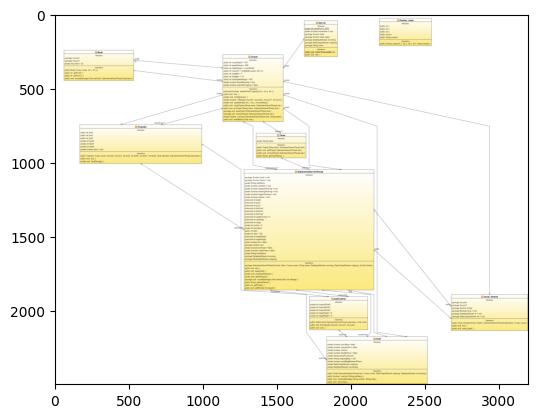

In [4]:
from detecto import core, utils
import matplotlib.pyplot as plt


image = utils.read_image('/content/drive/MyDrive/dataset_label/train/47.png')

plt.imshow(image)
plt.show()

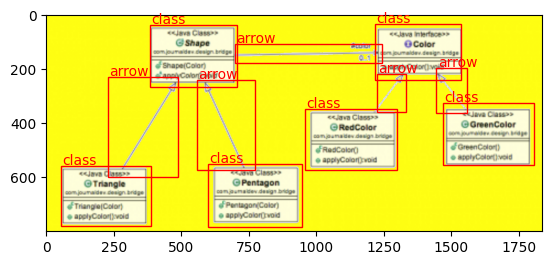

In [ ]:
from torchvision import transforms
from detecto import core
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])
dataset = core.Dataset('train.csv', train , transform=transform_img)

from detecto import visualize
image, information = dataset[47]
visualize.show_labeled_image(image, information['boxes'], information['labels'])


In [ ]:
dataloader = core.DataLoader(dataset)
dataloader
categories = ['class', 'arrow' , 'cross' , 'line']
model = core.Model(categories)

Epoch 1 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:36<00:00,  3.05it/s]


Epoch 2 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.08it/s]


Epoch 3 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:28<00:00,  3.91it/s]


Epoch 4 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  3.99it/s]


Epoch 5 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.03it/s]


Epoch 6 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.02it/s]


Epoch 7 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.00it/s]


Epoch 8 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.03it/s]


ValueError: ignored

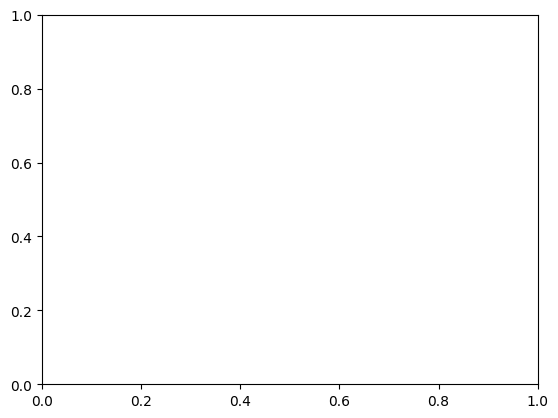

In [ ]:
history = model.fit(dataloader, epochs = 8 , learning_rate=0.001 , verbose = True)
model.save("/content/drive/MyDrive/dataset_label/model/uml_weights.pth")
plt.plot(history)
plt.show()
uml_model = model.get_internal_model()
print(type(uml_model))

Image Shape:  (261, 500, 3)
Initial predictions, w/o supression of overlapping bbox and accuracy filter
Total number of preictions:  34 



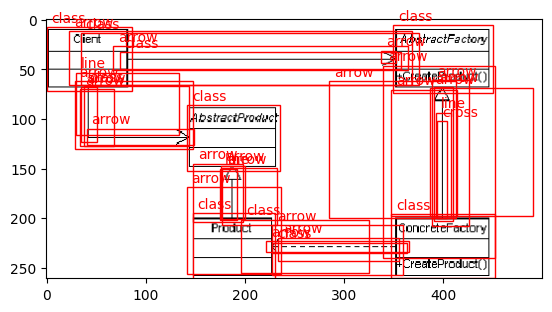




Filtered predictions after threshodling, i.e, accuracy > 0.25.
Total number of preictions:  10 



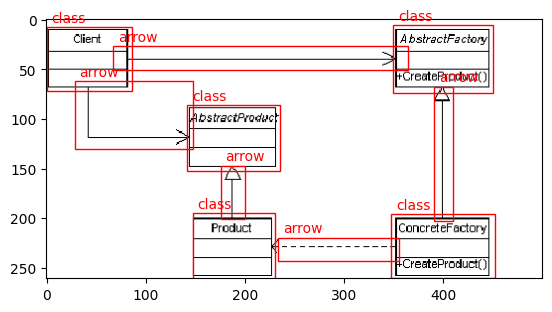



tensor([141.3789,  85.9625, 235.7707, 152.6816]) tensor(0.9960) class
tensor([147.3157, 194.6507, 229.9978, 261.0000]) tensor(0.9959) class
tensor([347.0215, 196.0160, 451.7340, 260.0413]) tensor(0.9956) class
tensor([349.4445,   5.5680, 450.3354,  74.0697]) tensor(0.9956) class
tensor([ 0.0000,  7.3536, 85.7262, 72.1650]) tensor(0.9951) class
tensor([175.3124, 147.0904, 200.0824, 201.0679]) tensor(0.9474) arrow
tensor([390.6566,  67.3890, 409.8688, 203.0674]) tensor(0.9235) arrow
tensor([ 66.7537,  26.4497, 363.9314,  50.9222]) tensor(0.8496) arrow
tensor([ 28.2325,  61.6529, 147.2331, 130.5559]) tensor(0.7388) arrow
tensor([233.4880, 219.4836, 354.8443, 243.2385]) tensor(0.7086) arrow


In [22]:
import numpy as np
image=utils.read_image('/content/drive/My Drive/dataset_label/test/AbstractFactoryUML.png')
print("Image Shape: ", image.shape)
predictions = model.predict(image)
labels, boxes, scores = predictions
# Show all the predictions, without filtering
print("Initial predictions, w/o supression of overlapping bbox and accuracy filter")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n\n")

# Filter the predictions, based on the accuracy of predictions
acc_threshold = 0.70
confident_idx = [idx for idx, entry in enumerate(scores) if entry >= acc_threshold]

labels = [labels[idx] for idx in confident_idx]
boxes, scores = boxes[confident_idx], scores[confident_idx]

print("Filtered predictions after threshodling, i.e, accuracy > 0.25.")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n")
for category, pred, confidence in zip(labels, boxes, scores):
  print(pred, confidence, category)
# print(labels)



## Load Model from file

In [9]:
import torch

# Definisci il percorso del file salvato
path = "/content/drive/MyDrive/dataset_label/model/uml_weights.pth"
categories = ['class', 'arrow' , 'cross' , 'line']

# Carica il modello
model = core.Model.load(path, categories)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 89.5MB/s]


Image Shape:  (261, 500, 3)
Initial predictions, w/o supression of overlapping bbox and accuracy filter
Total number of preictions:  34 



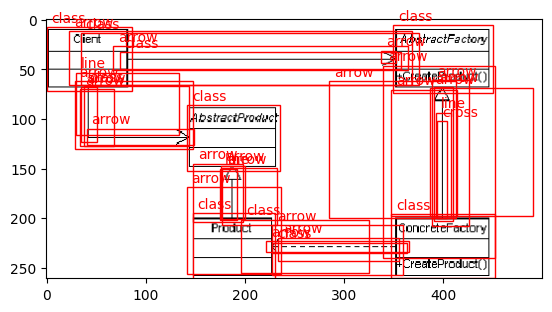




Filtered predictions after threshodling, i.e, accuracy > 0.25.
Total number of preictions:  12 



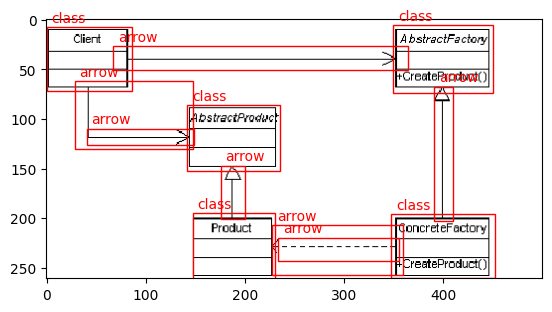



tensor([141.3789,  85.9625, 235.7707, 152.6816]) tensor(0.9960) class
tensor([147.3157, 194.6507, 229.9978, 261.0000]) tensor(0.9959) class
tensor([347.0215, 196.0160, 451.7340, 260.0413]) tensor(0.9956) class
tensor([349.4445,   5.5680, 450.3354,  74.0697]) tensor(0.9956) class
tensor([ 0.0000,  7.3536, 85.7262, 72.1650]) tensor(0.9951) class
tensor([175.3124, 147.0904, 200.0824, 201.0679]) tensor(0.9474) arrow
tensor([390.6566,  67.3890, 409.8688, 203.0674]) tensor(0.9235) arrow
tensor([ 66.7537,  26.4497, 363.9314,  50.9222]) tensor(0.8496) arrow
tensor([ 28.2325,  61.6529, 147.2331, 130.5559]) tensor(0.7388) arrow
tensor([233.4880, 219.4836, 354.8443, 243.2385]) tensor(0.7086) arrow
tensor([226.9684, 207.0733, 358.9984, 256.9322]) tensor(0.6571) arrow
tensor([ 40.3531, 109.7616, 148.5772, 126.0722]) tensor(0.6172) arrow


In [10]:
import numpy as np
image=utils.read_image('/content/drive/My Drive/dataset_label/test/AbstractFactoryUML.png')
print("Image Shape: ", image.shape)
predictions = model.predict(image)
labels, boxes, scores = predictions
# Show all the predictions, without filtering
print("Initial predictions, w/o supression of overlapping bbox and accuracy filter")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n\n")

# Filter the predictions, based on the accuracy of predictions
acc_threshold = 0.50
confident_idx = [idx for idx, entry in enumerate(scores) if entry >= acc_threshold]

labels = [labels[idx] for idx in confident_idx]
boxes, scores = boxes[confident_idx], scores[confident_idx]

print("Filtered predictions after threshodling, i.e, accuracy > 0.25.")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n")
for category, pred, confidence in zip(labels, boxes, scores):
  print(pred, confidence, category)
# print(labels)



## Segmentation

Filtered predictions after nonmax suppression of overlapping bboxes, IOU > 0.5
Total number of preictions:  12 



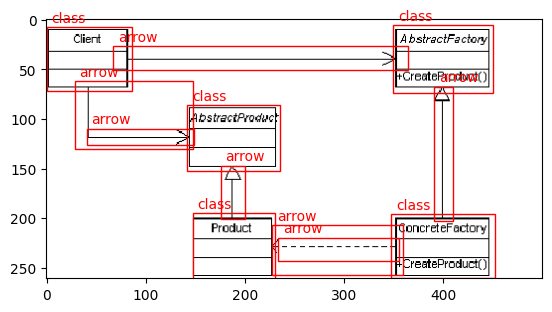



tensor([141.3789,  85.9625, 235.7707, 152.6816]) class tensor(0.9960)
tensor([147.3157, 194.6507, 229.9978, 261.0000]) class tensor(0.9959)
tensor([347.0215, 196.0160, 451.7340, 260.0413]) class tensor(0.9956)
tensor([349.4445,   5.5680, 450.3354,  74.0697]) class tensor(0.9956)
tensor([ 0.0000,  7.3536, 85.7262, 72.1650]) class tensor(0.9951)
tensor([175.3124, 147.0904, 200.0824, 201.0679]) arrow tensor(0.9474)
tensor([390.6566,  67.3890, 409.8688, 203.0674]) arrow tensor(0.9235)
tensor([ 66.7537,  26.4497, 363.9314,  50.9222]) arrow tensor(0.8496)
tensor([ 28.2325,  61.6529, 147.2331, 130.5559]) arrow tensor(0.7388)
tensor([233.4880, 219.4836, 354.8443, 243.2385]) arrow tensor(0.7086)
tensor([226.9684, 207.0733, 358.9984, 256.9322]) arrow tensor(0.6571)
tensor([ 40.3531, 109.7616, 148.5772, 126.0722]) arrow tensor(0.6172)


In [19]:
labels_map = { 'class': 1,
 'arrow': 2,
 'cross': 3,
 'line': 4
}
import torchvision
import torch
from pprint import pprint
#from torchmetrics.detection.map import MAP
# "ops.nms" returns the index (dec. ord of scores) of all bboxes that we
# should keep after performing the non-max suppression.
#
# Batched NMS does not supress overlapping boxes of different classes.
# Usually, best practice is to not supress boxes with different class
# labels and instead classify them as False positives (FP.
# Discards all overlapping boxes with IoU > iou_threshold
int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
keep = torchvision.ops.nms(boxes, scores, iou_threshold= 0.5)
filtered_boxes, filtered_scores = boxes[keep], scores[keep]
filtered_labels = [labels[idx] for idx in keep]
print("Filtered predictions after nonmax suppression of overlapping bboxes, IOU > 0.5")
print("Total number of preictions: ", len(filtered_boxes), "\n")
visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
print("\n")
for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
  print(fb, fl, fs)

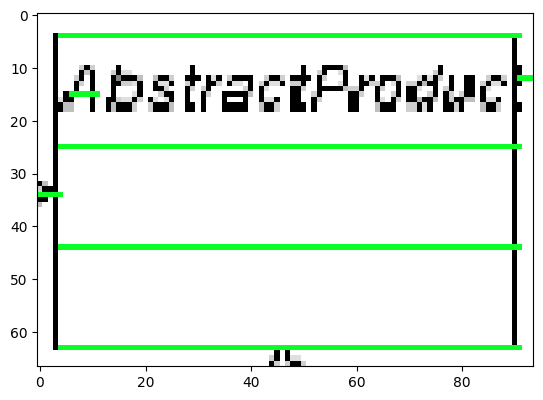

[11]


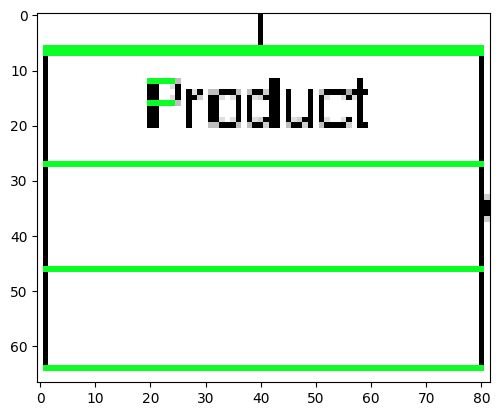

[13]


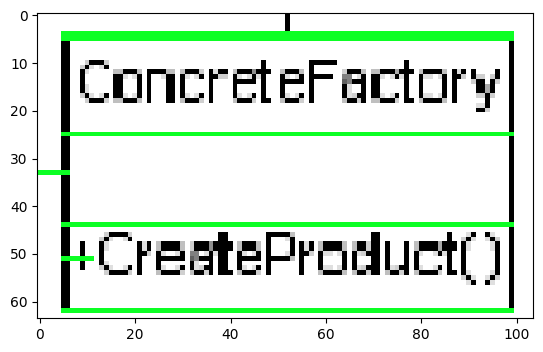

[19]


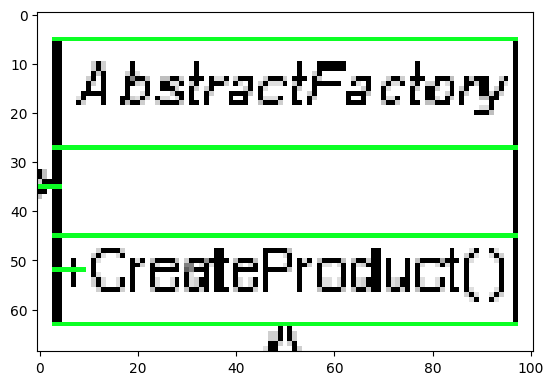

[20]


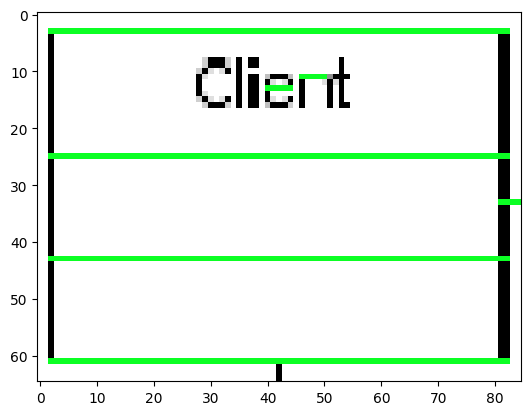

[10]


In [20]:
import cv2
import matplotlib.pyplot as plt
import time
def segment_uml_class(image, coordinates):
  xmin, ymin, xmax, ymax = map(int, coordinates)
  img = image.copy()[ymin: ymax, xmin: xmax]
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(img_gray, 127, 255,  cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  # Structuring element dimensions (width * height).
  # We take 7 % width for our mentioned bbox co-ordinate
  # Str El. Width can vastly differentiate the number of st.lines, we detect.
  # More zigzag lines means, width should be kept low.

  temp = int(0.5 * len(img[0]))
  str_element_width = int(0.07 * len(img[0]))
  str_element_height = 1

  # Detect horizontal lines
  # MORPH_OPEN work by first eroding the image(removing the small blobs)
  # and then dilation of the image(adding small blobs)

  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (str_element_width, str_element_height))
  detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations= 1)
  cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  # 'cnts' is a numpy.ndarray with shape N * 1 * 2
  # -> where N is the number of points
  # We need to merge the contours that is near each other in
  # vertical axis.
  # We represent the vertical threshold, as difference between 2
  45
  # contours, expressed a percentage

  vertical_threshold = .3
  count = 0
  reduced_cnts = []

  for c in cnts:
      cv2.drawContours(img, [c], -1, (12, 255, 36), 1)
      x, y, w, h = cv2.boundingRect(c)
      y = y + (h // 2)
      if not reduced_cnts:
        reduced_cnts.append(y)
      else:
        if abs(reduced_cnts[-1] - y) / 100 <= vertical_threshold:
          reduced_cnts[-1] = (reduced_cnts[-1] + y) // 2
        else:
          reduced_cnts.append(y)

  imgplot = plt.imshow(img)
  plt.show()

  print(reduced_cnts)
  return reduced_cnts

bbox_segments = {}
captured_reln = []


for fb, fl in zip(filtered_boxes, filtered_labels):
    if fl == 'class':
      # fb has data in order [xmin, ymin, xmax, ymax]
      key = (int(fb[0]), int(fb[2]))
      y_diff = int(fb[1])
      # Rescale the y-cordinates to the original image co-ordinates
      y_pts = list(map(lambda x : x + y_diff, segment_uml_class(image, fb)))
      class_segment = []
      for i in range(1, len(y_pts)):
        class_segment.append([y_pts[i-1], y_pts[i]])
        bbox_segments[key] = class_segment
    else:
      captured_reln.append(fl)



# Catch Exception for IndexError because, contours may not have length 4
# for every detected class, and classes that are falsely identified
# Plot all the class segments for each of the detected classes in image.
for k, v in bbox_segments.items():
    fig, axs = plt.subplots(1, 3)
    try:
      for i in range(len(v)):
        axs[i].imshow(image[v[i][1]: v[i][0], k[0]: k[1]])
    except IndexError:
      print("Exception occured in parsing UML class. \n \
      Reasons could be, \n \
      [wrong identification,\n \
      threshold for merging contours,\n \
      missing attributes or methods for class]\n \
      ")
      pass

# OpenCV

## Rectangle Detection

Problemi :
- detection di quello esterno non va bene....
aspect ratio non uso openCV ---> RISOLTO

- frecce rilevate...

Number of contours detected: 953


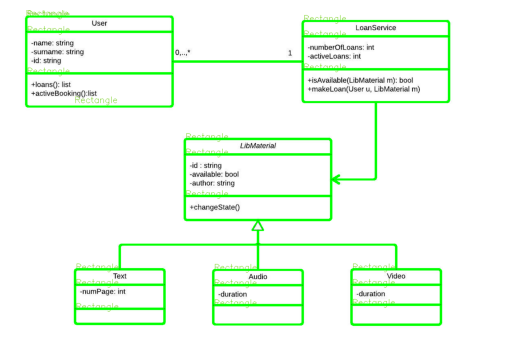

Number of rectangles found: 20


In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class.jpg')
rectangle_count = 0
height, width, _ = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)  #-> modifico il secondo valore per selezionare contorni diversi
print("Number of contours detected:", len(contours))

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ratio = float(w) / h
    if ratio >= 0.9 and ratio <= 1.1:
        continue  # Salta i quadrati
    if w < 20 or h < 20:  #w e h espressi in pixel
        continue  # Salta i rettangoli piccoli
    if w>=width or h>=height:
        continue

    rectangle_count += 1
    cv2.putText(img, 'Rectangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 200, 100), 1)
    img = cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()
print("Number of rectangles found:", rectangle_count)



## Text extraction

In [ ]:
pip install pytesseract
!apt-get install tesseract-ocr
!pip install pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import pytesseract

In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
extracted_text = pytesseract.image_to_string(gray)


In [ ]:
print(extracted_text)


Bank Account

Current Account Saving Account Credit Account

 

 



# STOP EX

In [ ]:

from google.colab import runtime
runtime.unassign()